# Hyper parameter : 사용자 지정
 - learning rate : model 학습율(0 ~ 1)
 - iteration size : model 반복학습 횟수
 - batch size : model 공급 데이터 크기  

In [1]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf # ver1.x
tf.disable_v2_behavior() # ver2.0 사용안함
from sklearn.datasets import load_iris

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:

iris = load_iris() # 0-1에 근사한 변수 선택
X = iris.data
y_data = X[:, 2] # 꽃잎 길이(3)
x_data = X[:, 3] # 꽃잎 넓이(4)


# Hyper parameter
learning_rate = 0.1 # 학습율 0.01 > 0.1
iter_size = 50 # 학습횟수 : 50 > 500

X = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])
a = tf.Variable(tf.random_normal(shape=[1], seed=123))
b = tf.Variable(tf.random_normal(shape=[1], seed=123))

# 단순 선형회귀모델 
model_output = tf.add(tf.multiply(X, a), b)

'''cost function'''
cost_l1 = tf.reduce_mean(tf.abs(y - model_output)) #  L1
cost_l2 = tf.reduce_mean(tf.square(y - model_output)) # L2

# L1 cost 최적화 
opt_l1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_l1 = opt_l1.minimize(cost_l1)

# L2 cost 최적화 
opt_l2 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_l2 = opt_l1.minimize(cost_l2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_l1_val = [] # L1 cost value
cost_l2_val = [] # L2 cost value


cost values
[0.3643758, 0.36420596, 0.36415836, 0.3640154, 0.36449903]
[0.22582622, 0.22587164, 0.22586639, 0.22597788, 0.2259681]


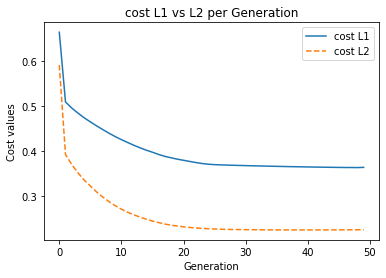

In [3]:
for i in range(iter_size) :     
    ''' model train '''
    feed_data = {X : x_data, y : y_data} # full data
    sess.run([train_l1, train_l2], feed_dict = feed_data)
    
    ''' cost value save '''
    cost_l1_re, cost_l2_re = sess.run([cost_l1, cost_l2], 
                                        feed_dict = feed_data)
    cost_l1_val.append(cost_l1_re)
    cost_l2_val.append(cost_l2_re)

''' cost values '''
print('cost values')
print(cost_l1_val[-5:])
print(cost_l2_val[-5:])

'''L1,L2 cost, learning rate, iteration '''
plt.plot(cost_l1_val, '-', label='cost L1')
plt.plot(cost_l2_val, '--', label='cost L2')
plt.title('cost L1 vs L2 per Generation')
plt.xlabel('Generation')
plt.ylabel('Cost values')
plt.legend(loc='best')
plt.show()